In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#3.  Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between salary and experience with  exerience in x-axis and salary in y axis. 
# a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case. 
# b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE). 
# c. Try with different values of intercept for slope beta  between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).
# d. Use the scikit learn and compare the results of MSE.

In [3]:
df1=pd.read_csv("data1.csv")
y=df1['salary'].values
X=df1['experience'].values

In [4]:
def metric(y,y_pred):
    error = np.mean(abs(y_pred-y))
    mse = np.mean((y_pred-y)**2)
    rmse = np.sqrt(mse)
    return error,mse,rmse
def gradient_descent(X,y,alpha,iters=4):
    b0=0
    b1=0
    over_error = []
    for i in range(iters):
        for j in range(len(X)):
            y_pred = b0 + b1 * X[j]
            error = y_pred - y[j]
            b0 = b0 - alpha * error
            b1 = b1 - alpha * error * X[j]
            _, _, rmse=metric(y,y_pred)
            over_error.append(rmse)
    
    return b0,b1, over_error

In [5]:
alpha=0.01
iters= 100
b0, b1, _ = gradient_descent(X,y,alpha, iters)
y_pred=b1*X + b0
_,mse,rmse=metric(y,y_pred)

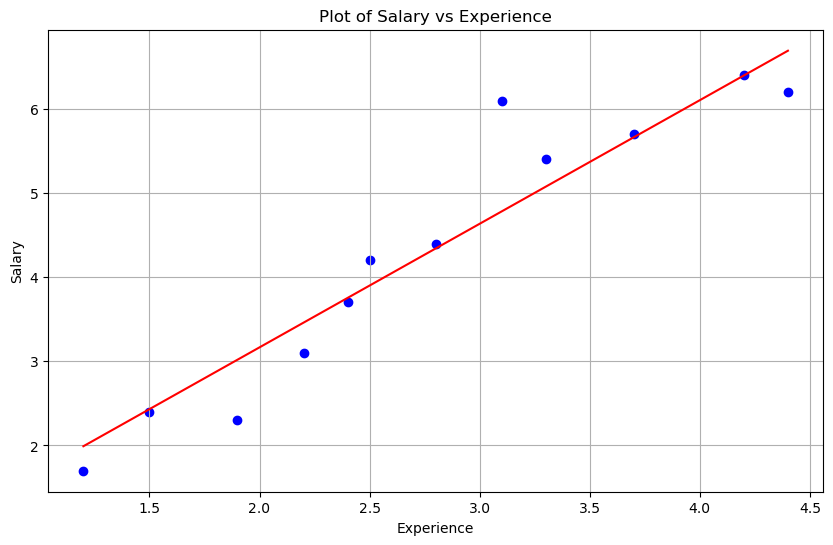

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y , color='b')
plt.plot(X, y_pred, linestyle='-', color='r')

plt.title('Plot of Salary vs Experience')
plt.ylabel('Salary')
plt.xlabel('Experience')

plt.grid(True)

plt.show()

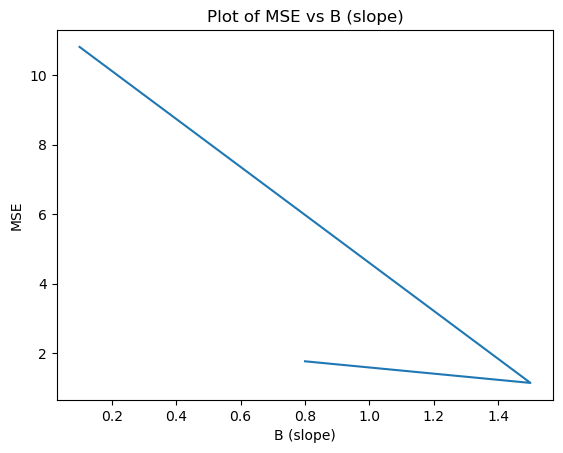

In [7]:
# a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case. 
b0=1.1
mse_list=[]
b=[0.1, 1.5, 0.8]

for b1 in b:
    y_pred=b1 * X + b0
    _, mse, _=metric(y,y_pred);
    mse_list.append(mse)
plt.plot(b, mse_list)
plt.title('Plot of MSE vs B (slope)')
plt.ylabel('MSE')
plt.xlabel('B (slope)')
plt.show()

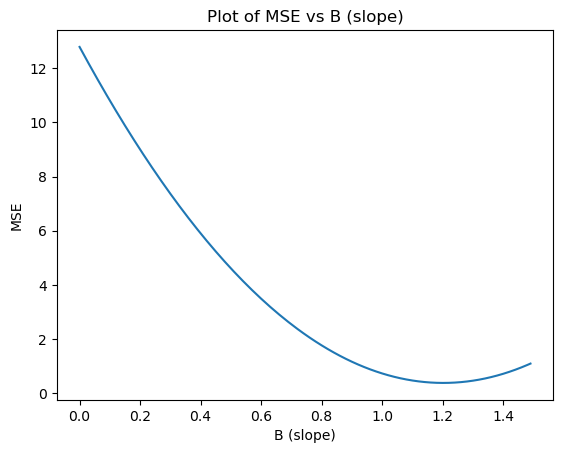

In [8]:
# b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE). 
b0=1.1
mse_list=[]
b=[]
i=0
while i<=1.5:
    b.append(i)
    i+=0.01
for b1 in b:
    y_pred=b1 * X + b0
    _, mse, _=metric(y,y_pred);
    mse_list.append(mse)
plt.plot(b, mse_list)
plt.title('Plot of MSE vs B (slope)')
plt.ylabel('MSE')
plt.xlabel('B (slope)')
plt.show()

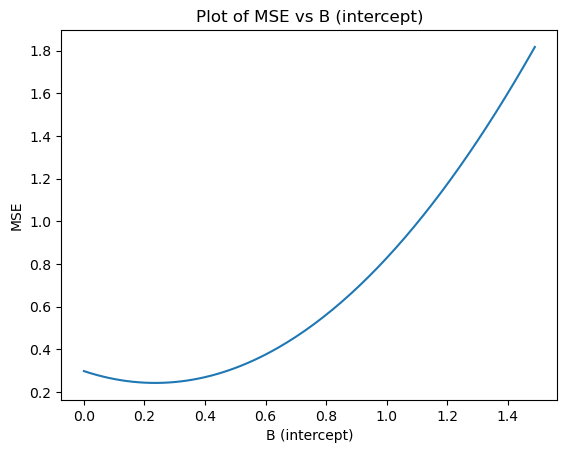

In [9]:
# c. Try with different values of intercept for slope beta  between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).
b1=1.4691471742789797
mse_list=[]
b0=[]
i=0
while i<=1.5:
    b0.append(i)
    i+=0.01
i=0
for j in b0:
    y_pred=b1 * X + j
    _, mse, _=metric(y,y_pred)
    mse_list.append(mse)
    
plt.plot(b0, mse_list)
plt.title('Plot of MSE vs B (intercept)')
plt.ylabel('MSE')
plt.xlabel('B (intercept)')
plt.show()

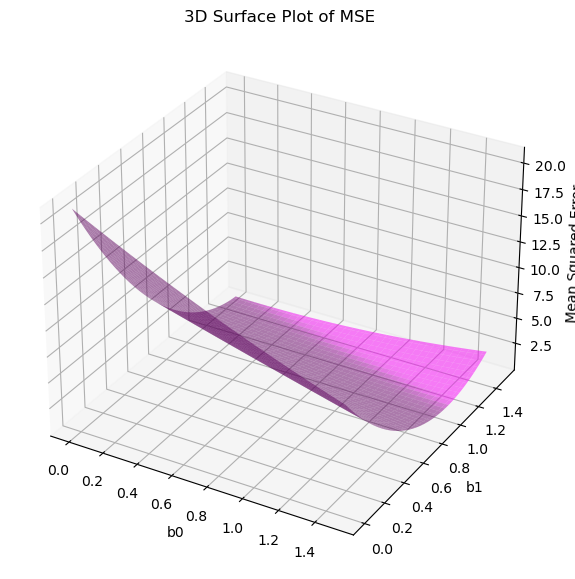

In [10]:
b0 = np.arange(0,1.51, 0.01)
b1 = np.arange(0,1.51, 0.01)
mse_list = []
for i in b1:
    z = []
    for j in b0:
        y_pred = i * X + j
        _, mse, _ = metric(y, y_pred)
        z.append(mse)
    mse_list.append(z)
mse_list = np.array(mse_list)
B0, B1 = np.meshgrid(b0, b1)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B0, B1, mse_list, color='magenta', alpha=0.5)
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('Mean Squared Error')
ax.set_title('3D Surface Plot of MSE')
plt.show()


In [11]:
from sklearn.linear_model import SGDRegressor

X = df1[['experience']].values
y = df1['salary'].values

sgd = SGDRegressor(max_iter=100, eta0=0.01)
sgd.fit(X, y)

sk_pred = sgd.predict(X)

metric(sk_pred, y)

(0.35985704658937684, 0.25787900864266705, 0.5078178892503366)

In [12]:
#     4. Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error for 60 iterations of 5 epochs. 
# a. Plot the graph of log loss/error versus iteration.  
# b. Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.
# c. Plot the graph between beta (X-axis)  and log loss/ error (Y-axis)  using scikit learn and your approach separately.  
# d. Plot the separate graph of –log(x) ( y=1 case) and –log(1-x) (y=0 case) and also draw the combined graph of .both cases.

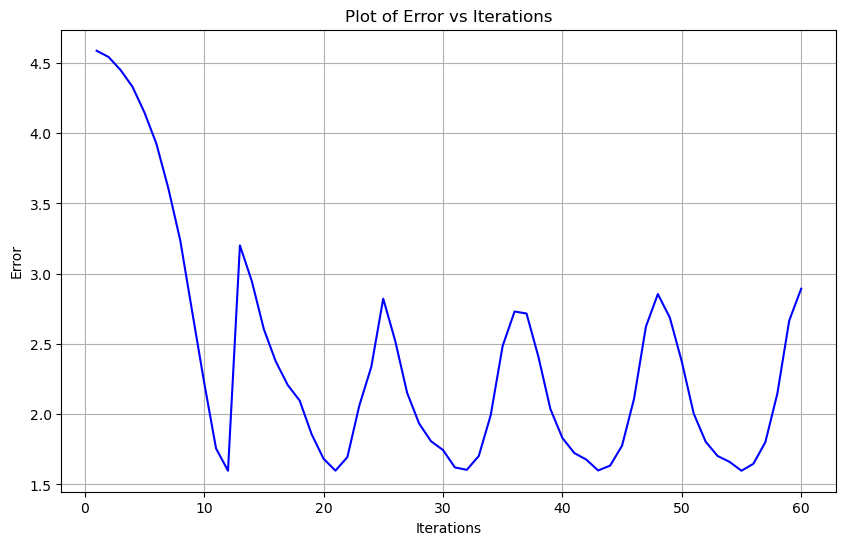

In [13]:
b0, b1, over_error = gradient_descent(X,y,alpha, 5)
plt.figure(figsize=(10, 6))
plt.plot(range(1,61) , over_error, linestyle='-', color='b')

plt.title('Plot of Error vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Error')

plt.grid(True)

plt.show()

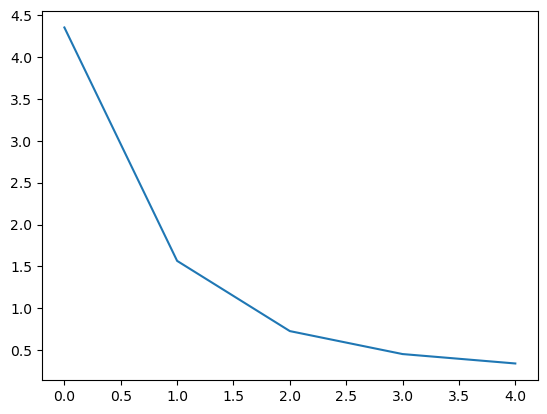

In [14]:
from sklearn.linear_model import SGDRegressor

X = df1[['experience']].values
y = df1['salary'].values

sgd = SGDRegressor(max_iter=5, eta0=0.01)
costs = []

for _ in range(5):
    sgd.partial_fit(X, y)
    y_pred = sgd.predict(X)
    loss = np.mean((y - y_pred) ** 2)
    costs.append(loss)
metric(y_pred, y)
plt.plot(range(len(costs)), costs)

In [18]:
from sklearn.linear_model import SGDRegressor
beta_values = np.linspace(-5, 5, 100)
log_losses = []

for beta in beta_values:
    y_pred_custom = beta * X
    mse_custom = mean_squared_error(y, y_pred_custom)
    log_loss_custom = mse_custom 
    log_losses.append(log_loss_custom)
    
sgd_regressor = SGDRegressor(max_iter=60, tol=1e-3, eta0=0.001, random_state=42)
sgd_regressor.fit(X_np, y_np)

# Predict using the trained model
y_pred = sgd_regressor.predict(X_np)
plt.figure(figsize=(12, 6))
plt.plot([sgd_regressor.coef_[0]], [mse], 'ro', label='Scikit-learn Result')
plt.plot(beta_values, log_losses, label='Custom Approach')

plt.xlabel('Beta (Coefficient)')
plt.ylabel('Log Loss/Error')
plt.title('Beta vs. Log Loss/Error')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'sgd_regressor' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate x values for the plot, avoiding 0 and 1
# x = np.linspace(0.01, 0.99, 500)

# # Compute -log(x) for y=1
# log_loss_y1 = -np.log(x)

# # Compute -log(1-x) for y=0
# log_loss_y0 = -np.log(1 - x)

# # Plot the log loss functions
# plt.figure(figsize=(12, 6))

# # Plot for y=1 case
# plt.plot(x, log_loss_y1, label='-log(x) for y=1', color='blue')

# # Plot for y=0 case
# plt.plot(x, log_loss_y0, label='-log(1-x) for y=0', color='red')

# # Combine both plots
# plt.title('Log Loss Functions for Binary Classification')
# plt.xlabel('x')
# plt.ylabel('Log Loss')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
#     5. Consider positive and negative slope dataset given below. Apply simple linear regression with gradient descent and illustrate the difference between slope values for both cases at different iterations. Plot the graph of slope(x-axis) vs  MSE (y-axis) for both case separately. 
# x = np.array([1, 2, 4, 3, 5])
# y = np.array([1, 3, 3, 2, 5])  # Positive slope

# x = np.array([1, 2, 3, 4, 5])
# y = np.array([10, 8, 6, 4, 2])  # Negative slope

In [ ]:
x = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5])  # Positive slope

In [ ]:
def gradient_descent(X,y,alpha,iters=4):
    b0=0
    b1=0
    b1_list=[]
    mse_list = []
    for i in range(iters):
        for j in range(len(X)):
            y_pred = b0 + b1 * X[j]
            error = y_pred - y[j]
            _, mse, _= metric(y, y_pred)
            b0 = b0 - alpha * error
            b1 = b1 - alpha * error * X[j]
            b1_list.append(b1)
            mse_list.append(mse)
    
    return b0,b1, b1_list, mse_list


In [ ]:
_, _, b1, mse_list = gradient_descent(x,y,0.01,10)
plt.plot( b1, mse_list)

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 8, 6, 4, 2])  # Negative slope
_, _, b1, mse_list = gradient_descent(x,y,0.01,10)
plt.plot( b1, mse_list)

In [ ]:
#         2. Consider positive and negative slope dataset given below. Apply 	logistic regression with gradient descent and illustrate the difference between slope values for both cases at different iterations. Plot the graph of slope(x-axis) vs  log-loss (y-axis) for both case separately. 

# x = np.array([1, 2, 3, 4, 5])
# y = np.array([0, 0, 1, 1, 1])  # Positive slope

# x = np.array([1, 2, 3, 4, 5])
# y = np.array([1, 1, 0, 0, 0])  # Negative slope

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1])  # Positive slope

In [ ]:
# np.random.seed(42)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def gradient_descent_logistic(X, y, alpha, iters):
    b0 = 0
    b1 = 0
    costs = []
    b1_list=[]

    for i in range(iters):
        for j in range(len(X)):
            y_pred = sigmoid(b1*X[j] + b0)
            error = y_pred - y[j]
            b0 = b0 - alpha*error
            b1 = b1 - alpha*error*X[j]
            b1_list.append(b1)
            y_pred = sigmoid(b1*X + b0)
            log_loss = -(1/len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            costs.append(log_loss)


    return costs, b1_list

In [ ]:
costs, b1_list=gradient_descent_logistic(x, y, 0.01, 100)

plt.plot( b1_list, costs)

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 1, 0, 0, 0])  # Negative slope
costs, b1_list=gradient_descent_logistic(x, y, 0.01, 100)

plt.plot( b1_list, costs)